# Capstone Project - Car accident severity (Week 2)

In this week, you will continue working on your capstone project. Please remember by the end of this week, you will need to submit the following:

1. A full report consisting of all of the following components (15 marks):
- Introduction where you discuss the business problem and who would be interested in this project.
- Data where you describe the data that will be used to solve the problem and the source of the data.
- Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
- Results section where you discuss the results.
- Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
- Conclusion section where you conclude the report.
2. A link to your Notebook on your Github repository pushed showing your code. (15 marks)

3. Your choice of a presentation or blogpost. (10 marks)

# Table of contents

1. Introduction and Business Problem
2. Data
3. Methodology
4. Result and Evaluation
5. Discussion
6. Conclusion

# 1. Introduction and Business Problem
The initial phase is to understand the project's objective from the business or application perspective. Accidents are nowadays really common.There are many types of collisions, including transportation, traffic, car accidents and so on. Collisions will display at the intersection or mid-block of a segment. This project will focus on predicting the severity of an accident, using the shared data for Seattle city as an example of how to deal with the accidents data. According to 37 different attributes, a supervised machine learning will be used to predict accidents to improve the predictability of the model. Using different sectors like weather, vehcount etc. is really important to avoid accidents. Once the problem confirmed, data understanding, preparation, modeling, evaluation and deployment will be used to anaylse this situation.

# 2. Data
In the phase of data understanding, dataset should be collected or extracted from various sources such as csv file or SQL database like excel document and background introduction. Then, the attributes (columns) that will be used to train the machine learning model should be determined. Also, we will assess the condition of chosen attributes by looking for trends, certain patterns, skewed information, correlations, and so on. Using the dataset given from Seattle Police Department, attributes can be used to weigh the severity of an accident are severitycode, weather, vehcount, personcount, lightcond and so on.
Data Preparation: The data preparation includes all the required activities to construct the final dataset which will be fed into the modeling tools. Data preparation can be performed multiple times and it includes balancing the labeled data, transformation, filling missing data, and cleaning the dataset.


# 3. Methodology
In modeling phase, various algorithms and methods can be selected and applied to build the model including supervised machine learning techniques.We can select a single or multiple machine learning models for the same data mining problem. At this phase, stepping back to the data preparation phase is often required. In evaluation phase, before proceeding to the deployment stage, the model needs to be evaluated thoroughly to ensure that the business or the applications' objectives are achieved. Certain metrics can be used for the model evaluation.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

client_bc57a32c7f1947ebb5d016b589e6939e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='j7jZvK4eLChCSO3C_tzeKgb5qN0V_w9qbnLghFyxZp0J',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_bc57a32c7f1947ebb5d016b589e6939e.get_object(Bucket='settingupgithubaccountfortheproje-donotdelete-pr-o1gsqcreq7nzbp',Key='Data-Collisions.csv')['Body']

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [4]:
df.shape

(194673, 38)

In [5]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [6]:
df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [7]:
df['EXCEPTRSNDESC'].value_counts()

Not Enough Information, or Insufficient Location Information    5638
Name: EXCEPTRSNDESC, dtype: int64

In [8]:
df.drop('PEDROWNOTGRNT', axis = 1, inplace =  True)

In [9]:
df.drop('SPEEDING', axis = 1, inplace =  True)

In [10]:
df.drop('EXCEPTRSNDESC', axis = 1, inplace =  True)

In [11]:
df1 = df[df['ROADCOND'] != 'unknown']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 35 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null object
JUNCTIONTYPE      188344 non-null ob

Let's take collisontype, weather, vehcount, lightcond, roadcount for a look.

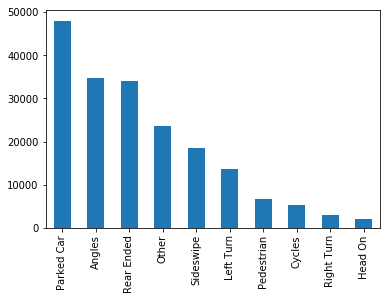

In [37]:
df['COLLISIONTYPE'].value_counts().plot(kind = 'bar')

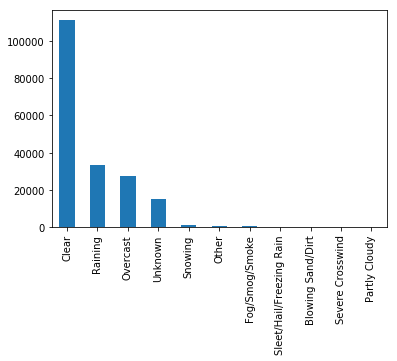

In [38]:
df['WEATHER'].value_counts().plot(kind = 'bar')

Especially the weather is clear, rather than rainy or overcast, the accidents are happened more often.

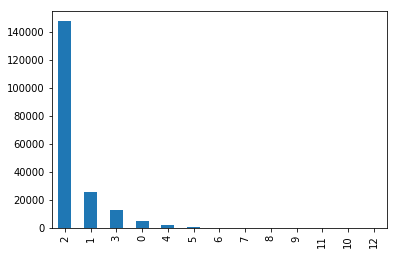

In [39]:
df['VEHCOUNT'].value_counts().plot(kind = 'bar')

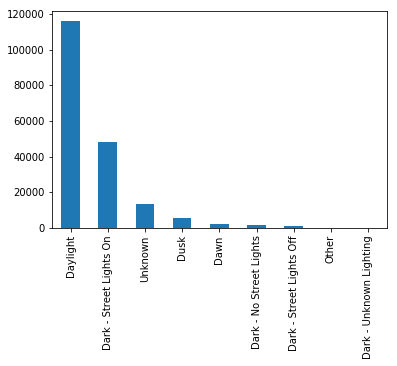

In [40]:
df['LIGHTCOND'].value_counts().plot(kind = 'bar')

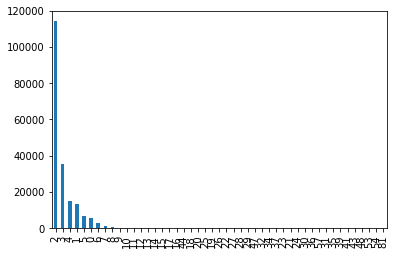

In [41]:
df['PERSONCOUNT'].value_counts().plot(kind = 'bar')

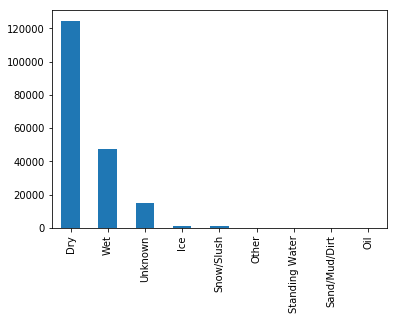

In [42]:
df['ROADCOND'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'Nummber of vehicles in accidents')

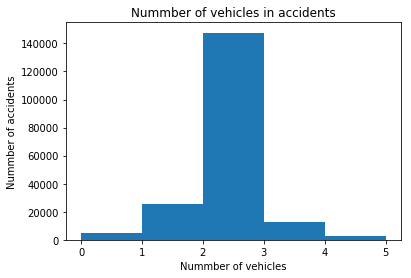

In [43]:
import seaborn as sns

bins = np.arange(df.PERSONCOUNT.min(), 6, 1)
plt.hist(df.VEHCOUNT, bins = bins)
plt.xlabel('Nummber of vehicles')
plt.ylabel('Nummber of accidents')
plt.title('Nummber of vehicles in accidents')

Text(0.5, 1.0, 'Nummber of persons in accidents')

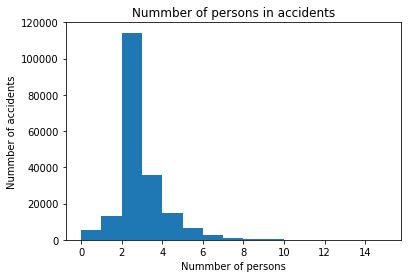

In [44]:
import seaborn as sns

bins = np.arange(df.PERSONCOUNT.min(), 16, 1)
plt.hist(df.PERSONCOUNT, bins = bins)
plt.xlabel('Nummber of persons')
plt.ylabel('Nummber of accidents')
plt.title('Nummber of persons in accidents')

According to the diagrams, most accidents include 2–3 vehicle and 2 - 4 persons.

In [45]:
Feature = df[['ADDRTYPE','COLLISIONTYPE','LIGHTCOND','ROADCOND','WEATHER','SEVERITYCODE' ]]
Feature.head()

,ADDRTYPE,COLLISIONTYPE,LIGHTCOND,ROADCOND,WEATHER,SEVERITYCODE
0,Intersection,Angles,Daylight,Wet,Overcast,2
1,Block,Sideswipe,Dark - Street Lights On,Wet,Raining,1
2,Block,Parked Car,Daylight,Dry,Overcast,1
3,Block,Other,Daylight,Dry,Clear,1
4,Intersection,Angles,Daylight,Wet,Raining,2


In [46]:
Feature = df[['ADDRTYPE','COLLISIONTYPE','LIGHTCOND','ROADCOND','WEATHER','SEVERITYCODE' ]]

In [47]:
X=Feature
X[0:5]

,ADDRTYPE,COLLISIONTYPE,LIGHTCOND,ROADCOND,WEATHER,SEVERITYCODE
0,Intersection,Angles,Daylight,Wet,Overcast,2
1,Block,Sideswipe,Dark - Street Lights On,Wet,Raining,1
2,Block,Parked Car,Daylight,Dry,Overcast,1
3,Block,Other,Daylight,Dry,Clear,1
4,Intersection,Angles,Daylight,Wet,Raining,2


In [48]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [13]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1h-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

In [49]:
df['INCDATE_1'] = pd.to_datetime(df['INCDATE'])
df['year_of_inci'] = df['INCDATE_1'].dt.year
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,INCDATE_1,year_of_inci
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,10,Entering at angle,0,0,N,2013-03-27 00:00:00+00:00,2013
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,6354039.0,11,From same direction - both going straight - bo...,0,0,N,2006-12-20 00:00:00+00:00,2006
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,4323031.0,32,One parked--one moving,0,0,N,2004-11-18 00:00:00+00:00,2004
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,23,From same direction - all others,0,0,N,2013-03-29 00:00:00+00:00,2013
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,4028032.0,10,Entering at angle,0,0,N,2004-01-28 00:00:00+00:00,2004


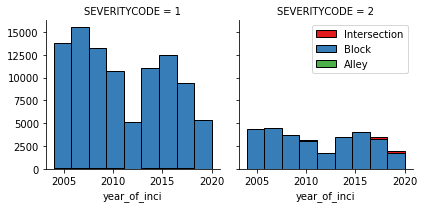

In [50]:
import seaborn as sns

bins = np.linspace(df.year_of_inci.min(), df.year_of_inci.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="ADDRTYPE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'year_of_inci', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

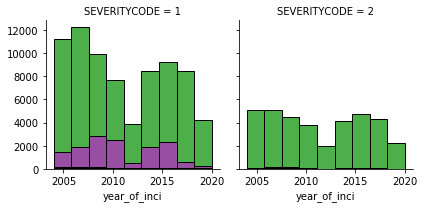

In [52]:
bins = np.linspace(df.year_of_inci.min(), df.year_of_inci.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="WEATHER", palette="Set1", col_wrap=2)
g.map(plt.hist, 'year_of_inci', bins=bins, ec="k")
plt.show()

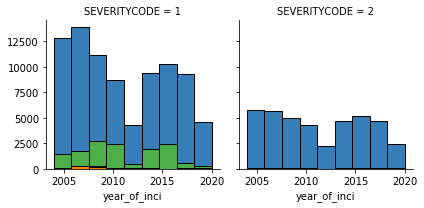

In [53]:
bins = np.linspace(df.year_of_inci.min(), df.year_of_inci.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="ROADCOND", palette="Set1", col_wrap=2)
g.map(plt.hist, 'year_of_inci', bins=bins, ec="k")
plt.show()

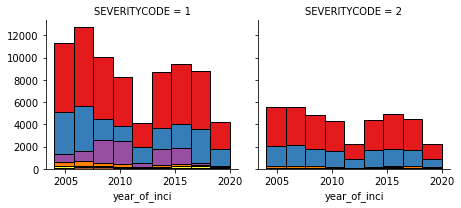

In [54]:
bins = np.linspace(df.year_of_inci.min(), df.year_of_inci.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="LIGHTCOND", palette="Set1", col_wrap=10)
g.map(plt.hist, 'year_of_inci', bins=bins, ec="k")
plt.show()

# 4. Result and Evaluation
As the result,the number of people involved in these accidents at any given time. Most accidents included two to four people between two to three cars. It is also important to find out where most accidents taken place, intersections are the most common accident zones. Analysing the severity based on weather, road condition, light condition against each year. As unexpected, clear roads cause more accidents than wet or bad roads.

# 5. Discussion
Using the important attributes like weather, vehcount, lightcond, roadcond, we can find that the amount of car accidents are related to these factors and are influenced much by them. But there are still many missing factors and we need to drop from the data to get good results, like the attribute "SPEED", "EXCEPTRSNDESC" and "PEDROWNOTGRNT" . However, They are also important factors that should be considered especially the speed, despite the data is not entire.

# 6. Conclusion
Most accidents occur in clear, dry and bright environments and include two to three vehicle and two to four persons. The most common collisiontype is parked car and the next is angles, which means that these kind of collison can be avoided by improving carefulness. The severity of these accidents are not serious like crashes. The data results indicate to official department that they should ask drivers to be more careful or take some measures like installing the monitoring in the places of high pedestrian and vehicular traffic or using specific technology in our cars to notice people.This could be helpful to prevent future accidents.